In [1]:
library(MASS)

# 1. Box-Muller method

## (a)

In [2]:
n = 5000
u = matrix(runif(2*n,0,1), n, 2, TRUE)

## (b)

In [3]:
x = NULL
for (i in 1:n){
    x[2*i-1] = sqrt(-2*log(u[i,1]))*cos(2*pi*u[i,2])
    x[2*i] = sqrt(-2*log(u[i,1]))*sin(2*pi*u[i,2])
}

## (c)

In [4]:
chisq.test(x, rnorm(10000,0,1))

Warning message in chisq.test(x, rnorm(10000, 0, 1)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  x and rnorm(10000, 0, 1)
X-squared = 99990000, df = 99980001, p-value = 0.2397


In [5]:
ks.test(x, rnorm(10000,0,1))


	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(10000, 0, 1)
D = 0.0094, p-value = 0.7689
alternative hypothesis: two-sided


Conclusion: By $\chi^2$-test and Kolmogorov–Smirnov test, the obtained $X_i$'s are not standard Gaussian distribution.

# 2. Marsaglia polar method

## (a)

In [6]:
n = 5000
u = matrix(0,1,2)
while (nrow(u)<=5000){
    u_0 = runif(2,-1,1)
    if ((u_0[1]^2+u_0[2]^2<=1)&(u_0[1]^2+u_0[2]^2>0)){
        u = rbind(u,u_0)
    }
}
u = u[-1,]

## (b)

In [7]:
u = as.data.frame(u)
colnames(u) = c('u_1', 'u_2')
u$r = u$u_1^2+u$u_2^2
u$x_1 = sqrt(-2*log(u$r)/u$r)*u$u_1
u$x_2 = sqrt(-2*log(u$r)/u$r)*u$u_2
u[1:3,]

,u_1,u_2,r,x_1,x_2
u_0,0.3266459,-0.642979812,0.5201206,0.5178782,-1.019407405
u_0.1,-0.1517733,-0.330756489,0.1324350,-0.8386164,-1.827580242
u_0.2,-0.9531061,0.009475688,0.9085010,-0.4380635,0.004355185


## (c)

In [8]:
chisq.test(as.numeric(as.matrix(u[,4:5])), rnorm(10000,0,1))

Warning message in chisq.test(as.numeric(as.matrix(u[, 4:5])), rnorm(10000, 0, 1)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  as.numeric(as.matrix(u[, 4:5])) and rnorm(10000, 0, 1)
X-squared = 99990000, df = 99980001, p-value = 0.2397


In [9]:
ks.test(as.numeric(as.matrix(u[,4:5])), rnorm(10000,0,1))


	Two-sample Kolmogorov-Smirnov test

data:  as.numeric(as.matrix(u[, 4:5])) and rnorm(10000, 0, 1)
D = 0.0102, p-value = 0.6756
alternative hypothesis: two-sided


Conclusion: By $\chi^2$-test and Kolmogorov–Smirnov test, the obtained $X_i$'s are not standard Gaussian distribution.

## (d)

Marsaglia polar method is faster.

# 3. Inverse CDF method

## (a)

In [10]:
u = runif(10000,0,1)

## (b)

In [11]:
s = 2*as.numeric(u>.5)-1

## (c)

In [12]:
u = runif(10000,0,1)

## (d)

In [13]:
s = 2*as.numeric(u>.5)-1

In [14]:
x = s*sqrt(pi/8)*log((1+u)/(1-u))

## (e)

In [15]:
chisq.test(x, rnorm(10000,0,1))

Warning message in chisq.test(x, rnorm(10000, 0, 1)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  x and rnorm(10000, 0, 1)
X-squared = 99990000, df = 99980001, p-value = 0.2397


In [16]:
ks.test(x, rnorm(10000,0,1))


	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(10000, 0, 1)
D = 0.253, p-value < 2.2e-16
alternative hypothesis: two-sided


Conclusion: By $\chi^2$-test, the obtained $X_i$'s are not standard Gaussian distribution. However, Kolmogorov–Smirnov test shows that the obtained $X_i$'s are standard Gaussian distribution

## (f)

It's not symmetry, and has an empty interval.

[1] 0.5245531

[1] 1.586499e-04 1.018499e+01

[1] -0.6883367  6.3824942

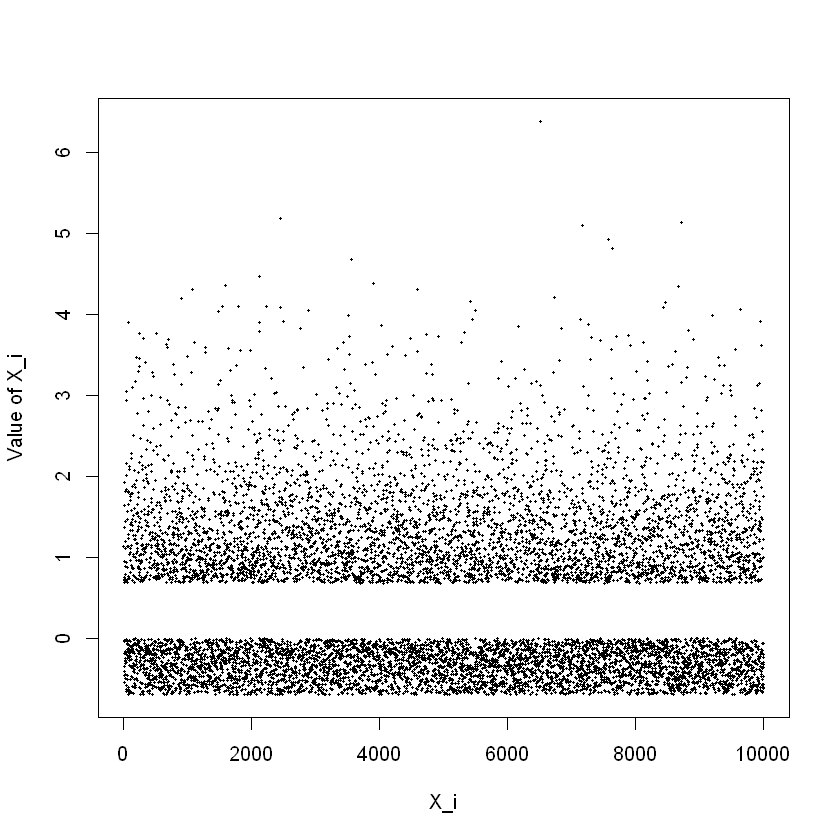

In [32]:
mean(x)
range(log((1+u)/(1-u)))
range(x)
plot(x,pch = 16,cex = .3, xlab = 'X_i', ylab = 'Value of X_i')

## (g)

$E[X_i] = E[\sqrt{\pi/8}S_i(log(1+U_i)-log(1-U_i))] = \sqrt{\pi/8}E[S_i]E[log(1+U_i)-log(1-U_i)] = \sqrt{\pi/8}*0*1.1 = 0*0.6893$

To make $E[X_i] = -2$, can make $E[S_i] = -2 / 0.6893 = -2.9015$ 

Change the rule of $S_i$ to: $S_i = 2\[ \mathbb{1} \]_{U_i>1/2} - 1 - 2.9015$

After the change, the mean of $X_i$ is close to $-2$

[1] -1.956571

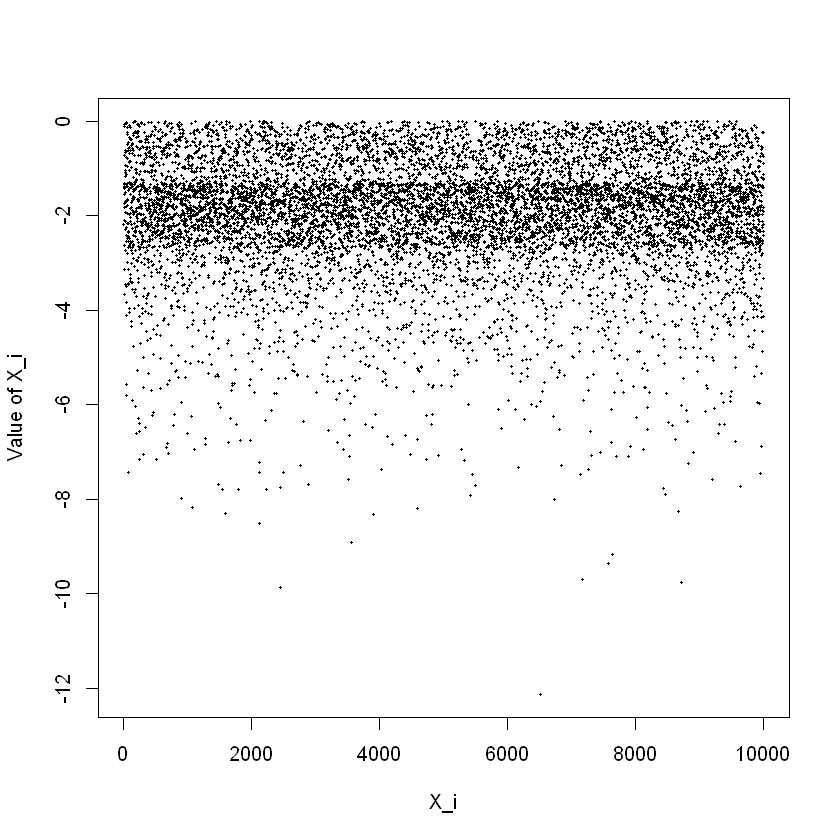

In [36]:
s = 2*as.numeric(u>.5)-3.9015
x = s*sqrt(pi/8)*log((1+u)/(1-u))
mean(x)
plot(x,pch = 16,cex = .3, xlab = 'X_i', ylab = 'Value of X_i')